# Tutorial 2: Part 3
Objectives:
- Build a transfer line and compute the TWISS functions from given initial conditions.
- Matching.

**Transfer lines: periodic and initial conditions**

1. Build a tranfer line for a 2 GeV proton beam of 10 m length with 4 quadrupoles of L=0.4 m (centered at 2, 4,6 and 8 m). With K1 respectively of 0.1, 0.1, 0.1, 0.1 $m^{-2}$. Can you find a periodic solution?

<div>
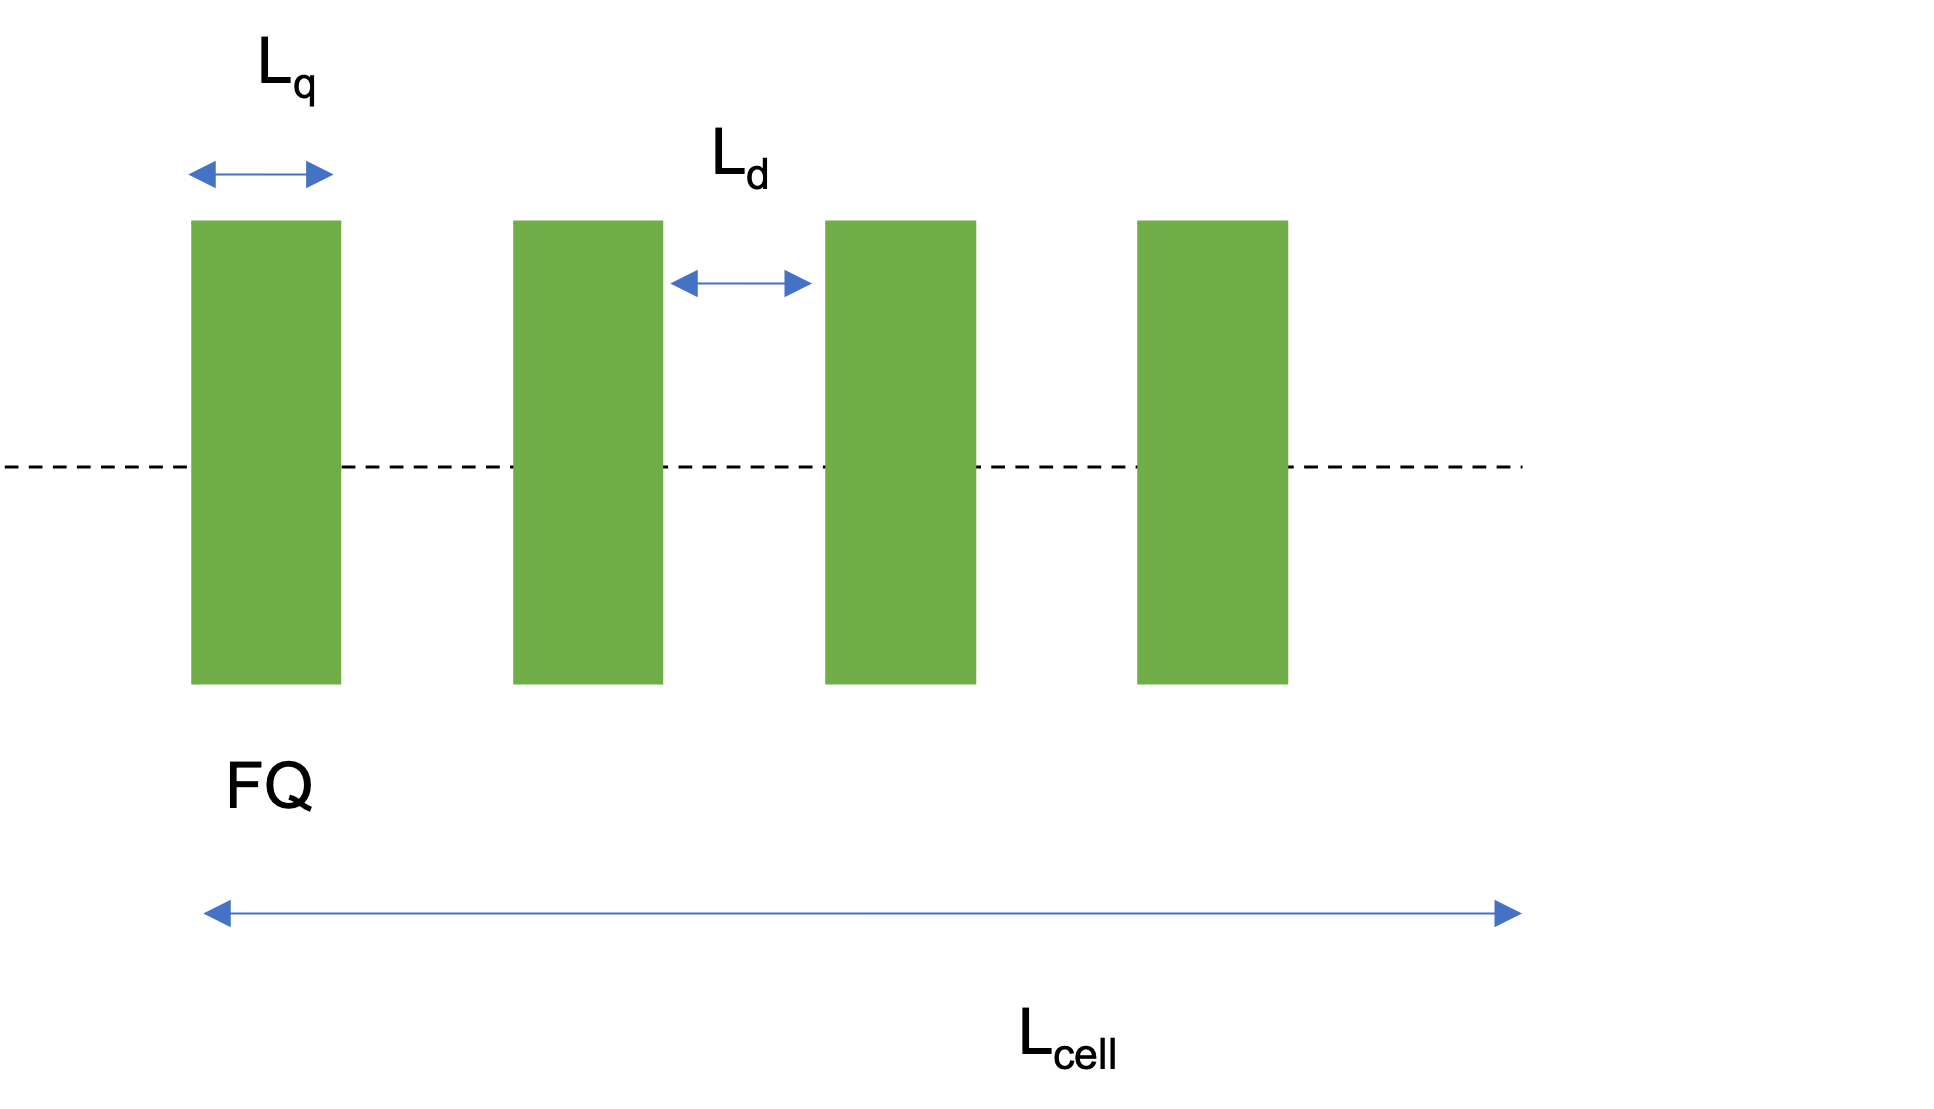
</div>

2. Can you find an initial condition (IC) solution starting from ($\beta_x$, $\alpha_x$, $\beta_y$, $\alpha_y$) = (1 m, 0, 2 m, 0)? Compute the corresponding quadrupole gradients. What is the final optical conditions ($\beta_x^{end}$, $\alpha_x^{end}$, $\beta_y^{end}$, $\alpha_y^{end}$)?

**Tranfer lines: the matching**

3. Starting from ($\beta_x$, $\alpha_x$, $\beta_y$, $\alpha_y$) = (1 m, 0, 2 m, 0) match the line to ($\beta_x^{end}$, $\alpha_x^{end}$, $\beta_y^{end}$, $\alpha_y^{end}$)= (2,0,1,0) at the end.


        MATCH, SEQUENCE=myCell, betx=??, bety=??;
        constraint, betx=??, range=#e;
        constraint, ??, ??;
        constraint, ??, ??;
        constraint, ??, ??;
        VARY, NAME= ??, STEP=0.00001;
        VARY, NAME= ??, STEP=0.00001;
        VARY, NAME= ??, STEP=0.00001;
        VARY, NAME= ??, STEP=0.00001;
        JACOBIAN, CALLS=50, TOLERANCE=1e-20;//method adopted
        ENDMATCH;

4. Starting from ($\beta_x$, $\alpha_x$, $\beta_y$, $\alpha_y$) = (1 m, 0, 2 m, 0) and the gradient obtained with previous matching, match to ($\beta_x^{end}$, $\alpha_x^{end}$, $\beta_y^{end}$, $\alpha_y^{end}$) found in point 3. Can you find back K1 respectively of 0.1,0.1,0.1,0.1 $m^{-2}$?. Compute the required gradients for this solution.

**BONUS:**

5. Consider that the quadrupole have an excitation current factor of 100 A $m^2$ and an excitation magnetic factor of 2 T/m/A amd an aperture of 40 mm diameter. Compute the magnetic field at the poles of the four quadrupoles for the two matching solutions found in the exercice. (HINT: assume a linear regime and use a dimensional approach).



In [1]:
from matplotlib import pyplot as plt
import numpy as np
from cpymad.madx import Madx
import pandas as pd

In [2]:
myMad = Madx(stdout=True)

1. Build a tranfer line of 10 m with 4 quadrupoles of L=0.4 m (centered at 2,4,6 and 8 m). With K1 respectively of 0.1, 0.1, 0.1 𝑚−2. Can you find a periodic solution? 

In [ ]:
myString='''

! *********************************************************************
! Definition of parameters
! *********************************************************************

quadrupoleLenght=??;
cellLength=??;

myK1=??;// m^-2
myK2=??;// m^-2
myK3=??;// m^-2
myK4=??;// m^-2

! *********************************************************************
! Definition of magnets
! ********************************************************************* 

Q: ??, L=??;

! *********************************************************************
! Definition of sequence
! *********************************************************************

??:sequence, refer=??, L=??;
myStart: marker, at=0;
q1: ??,K1:=??, at=??;
q2: ??,K1:=??, at=??;
q3: ??,K1:=??, at=??;
q4: ??,K1:=??, at=??;
myEnd: marker, at=??;
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************

beam, particle=??, energy=??;

! *********************************************************************
! Activate the sequence
! *********************************************************************

use, sequence=myCell;

! *********************************************************************
! Twiss
! *********************************************************************

twiss;
'''
myMad.input(myString);

What happens?

2. Can you find a IC solution starting from (𝛽𝑥, 𝛼𝑥, 𝛽𝑦, 𝛼𝑦) = (1 m, 0, 2 m, 0)?. Compute the corresponding quadrupole gradients.

    
3. What is the final optical conditions ($\beta_x^{end}$, $\alpha_x^{end}$, $\beta_y^{end}$, $\alpha_y^{end}$)? .

In [110]:
myString='''
twiss,betx=??, bety=??;
'''
myMad.input(myString);

In [ ]:
#Access the TWISS table using the command myMad.table['twiss'].dframe()


In [ ]:
# Compute the gradients obtained from the data on the TWISS table


In [ ]:
%matplotlib notebook
aux1=myMad.table['twiss'].dframe()
plt.plot(aux1['s'],aux1['betx'],'o-r', label='$\\beta_x$')
plt.plot(aux1['s'],aux1['bety'],'s-b', label='$\\beta_y$')
plt.legend(loc='best')
plt.grid()
plt.xlabel('s [m]')
plt.ylabel('[m]')

# First matching

4. Starting from ($\beta_x$, $\alpha_x$, $\beta_y$, $\alpha_y$) = (1 m, 0, 2 m, 0) match the line to ($\beta_x^{end}$, $\alpha_x^{end}$, $\beta_y^{end}$, $\alpha_y^{end}$)= (2 m,0,1 m,0) at the end.

In [ ]:
myString='''

MATCH, SEQUENCE=??, betx=??, bety=??;
constraint, betx=??, range=#e;
constraint, ??, ??;
constraint, ??, ??;
constraint, ??, ??;
VARY, NAME= ??, STEP=0.00001;
VARY, NAME= ??, STEP=0.00001;
VARY, NAME= ??, STEP=0.00001;
VARY, NAME= ??, STEP=0.00001;
JACOBIAN, CALLS=50, TOLERANCE=1e-20;//method adopted
ENDMATCH;

twiss,betx=??, bety=??, file="AfterMatching1.txt";
'''
myMad.input(myString);

In [ ]:
# Access the TWISS table using the command myMad.table['twiss'].dframe()

In [ ]:
# Compute the gradients obtained from the data on the TWISS table

In [ ]:
%matplotlib notebook
aux2= myMad.table['twiss'].dframe()
plt.plot(aux2['s'],aux2['betx'],'o-r', label='$\\beta_x$')
plt.plot(aux2['s'],aux2['bety'],'s-b', label='$\\beta_y$')
plt.legend(loc='best')
plt.grid()
plt.xlabel('s [m]')
plt.ylabel('[m]')

# Second matching

5. Starting from ($\beta_x$, $\alpha_x$, $\beta_y$, $\alpha_y$) = (1 m, 0, 2 m, 0) and the gradient obtained with previous matching, match to ($\beta_x^{end}$, $\alpha_x^{end}$, $\beta_y^{end}$, $\alpha_y^{end}$). Can you find back K1 respectively of 0.1,0.1,0.1,0.1 $m^{-2}$?. Compute the required gradients for this solution.

In [117]:
myString='''
MATCH, SEQUENCE=??, betx=??, bety=??;
constraint, ??, ??;
constraint, ??, ??;
constraint, ??, ??;
constraint, ??, ??;
VARY, NAME= ??, STEP=0.00001;
VARY, NAME= ??, STEP=0.00001;
VARY, NAME= ??, STEP=0.00001;
VARY, NAME= ??, STEP=0.00001;
JACOBIAN, CALLS=50, TOLERANCE=1e-20;//method adopted
ENDMATCH;
twiss,betx=??, bety=??;
'''
myMad.input(myString);

In [ ]:
#Access the TWISS table using the command myMad.table['twiss'].dframe()

In [ ]:
# Compute the gradients obtained from the data on the TWISS table

In [ ]:
%matplotlib notebook
aux3=myMad.table['twiss'].dframe()
plt.plot(aux3['s'],aux3['betx'],'b', label='$\\beta_x$ second matching')
plt.plot(aux3['s'],aux3['bety'],'r', label='$\\beta_y$ second matching')

plt.plot(aux1['s'],aux1['betx'],':b', label='$\\beta_x$ w/ initial configuration')
plt.plot(aux1['s'],aux1['bety'],':r', label='$\\beta_x$ w/ initial configuration')
plt.legend(loc='best')
plt.grid()
plt.xlabel('s [m]')
plt.ylabel('[m]')

What happened? Why?

**BONUS:**

# About gradients
6. Consider that the quadrupole have an excitation current factor of 10 A $m^2$ and an excitation magnetic factor of 2 T/m/A amd an aperture of 40 mm diameter. Compute the mgnetic field at the poles of the four quadrupoles after matching. (HINT: assume a linear regime and use a dimensional approach).